In [1]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

energy_df=pd.read_csv("cleaned_generation.csv")
energy_df.head()


,Unnamed: 0,Year,Region,Wind2,Wave and tidal,Solar PV,Hydro,Landfill gas,Other bioenergy (incl Sewage gas3,Total
0,1,2003,England,349.2,0.0,0.0,25.3,"2,899.0","2,716.9","5,990.4"
1,2,2003,East Midlands,1.3,0.0,0.0,5.5,223.1,202.7,432.6
2,3,2003,East of England,19.8,0.0,0.0,-,756.4,748.8,"1,525.0"
3,4,2003,North East,28.6,0.0,0.0,…,89.9,139.0,257.5
4,5,2003,North West,120.8,0.0,0.0,2.0,519.4,216.3,858.5


In [2]:
energy_df.drop('Unnamed: 0',axis=1,inplace=True)
energy_df.head()

,Year,Region,Wind2,Wave and tidal,Solar PV,Hydro,Landfill gas,Other bioenergy (incl Sewage gas3,Total
0,2003,England,349.2,0.0,0.0,25.3,"2,899.0","2,716.9","5,990.4"
1,2003,East Midlands,1.3,0.0,0.0,5.5,223.1,202.7,432.6
2,2003,East of England,19.8,0.0,0.0,-,756.4,748.8,"1,525.0"
3,2003,North East,28.6,0.0,0.0,…,89.9,139.0,257.5
4,2003,North West,120.8,0.0,0.0,2.0,519.4,216.3,858.5


In [3]:
#check columns for datatype
energy_df.dtypes

Year                                   int64
Region                                object
Wind2                                 object
Wave and tidal                       float64
Solar PV                              object
Hydro                                 object
Landfill gas                          object
Other bioenergy (incl Sewage gas3     object
Total                                 object
dtype: object

In [4]:
#check for N/A values
energy_df.apply(lambda x: x.isnull().sum())

Year                                 0
Region                               0
Wind2                                0
Wave and tidal                       0
Solar PV                             0
Hydro                                0
Landfill gas                         0
Other bioenergy (incl Sewage gas3    0
Total                                0
dtype: int64

In [5]:
pd.to_numeric(energy_df['Hydro'],'coerce').head(20)

0      25.3
1       5.5
2       NaN
3       NaN
4       2.0
5       NaN
6       NaN
7      16.4
8       1.4
9       NaN
10      6.7
11      NaN
12    194.7
13      8.8
14     70.2
15     11.1
16      NaN
17     16.9
18      8.2
19      NaN
Name: Hydro, dtype: float64

In [6]:
def change_to_number(column):
    if np.issubdtype(column.dtype, np.number):
        return column
    if column.name=='Region':
        return column
    return pd.to_numeric(column.apply(lambda x: x.replace(',','')),errors='coerce').fillna(value=0.0)

energy_df_numeric=energy_df.apply(change_to_number)
energy_df_numeric.head()
    

,Year,Region,Wind2,Wave and tidal,Solar PV,Hydro,Landfill gas,Other bioenergy (incl Sewage gas3,Total
0,2003,England,349.2,0.0,0.0,25.3,2899.0,2716.9,5990.4
1,2003,East Midlands,1.3,0.0,0.0,5.5,223.1,202.7,432.6
2,2003,East of England,19.8,0.0,0.0,0.0,756.4,748.8,1525.0
3,2003,North East,28.6,0.0,0.0,0.0,89.9,139.0,257.5
4,2003,North West,120.8,0.0,0.0,2.0,519.4,216.3,858.5


In [7]:

energy_df_numeric.describe()

,Year,Wind2,Wave and tidal,Solar PV,Hydro,Landfill gas,Other bioenergy (incl Sewage gas3,Total
count,182.000000,182.000000,182.000000,182.000000,182.00000,182.000000,182.000000,182.000000
mean,2009.000000,1418.137363,0.096154,156.513736,358.73956,616.604945,279.401648,1533.104396
std,3.751979,2964.483062,0.442540,610.473572,1192.16731,976.395992,651.512304,2878.258358
min,2003.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2006.000000,45.325000,0.000000,0.000000,0.60000,165.550000,38.975000,318.575000
50%,2009.000000,329.850000,0.000000,0.550000,11.95000,323.100000,82.400000,577.100000
75%,2012.000000,1293.425000,0.000000,69.300000,29.75000,643.650000,251.750000,1183.950000
max,2015.000000,20917.000000,3.100000,6570.300000,5757.10000,4336.300000,4551.100000,21487.600000


In [8]:
#Questions: 1) Highest renewable energy generator per year? per country? growth?
highest_solar_in_year2012=energy_df_numeric.iloc[energy_df_numeric[energy_df_numeric['Year']==2012]['Solar PV'].idxmax()]
highest_solar_in_year2012.head()

Year                 2012
Region            England
Wind2              9050.9
Wave and tidal        0.2
Solar PV           1139.5
Name: 126, dtype: object

In [9]:
by_year=energy_df_numeric.groupby('Year')['Solar PV'].idxmax()
by_year.head()
highest_solar_per_year=energy_df_numeric.iloc[by_year.values]
highest_solar_per_year.head(20)
#Solar Dominated on Other sites until 2010 where England starts to up their solar game slowly

,Year,Region,Wind2,Wave and tidal,Solar PV,Hydro,Landfill gas,Other bioenergy (incl Sewage gas3,Total
13,2003,Other Sites4,0.0,0.0,2.9,8.8,0.0,0.0,11.7
27,2004,Other Sites4,8.7,0.0,4.0,0.7,0.0,0.0,13.4
41,2005,Other Sites4,9.3,0.0,8.2,2.5,0.0,0.0,20.0
55,2006,Other Sites4,15.7,0.0,10.7,0.6,0.0,0.0,27.0
69,2007,Other Sites4,4.1,0.0,13.8,0.0,0.0,0.0,17.9
83,2008,Other Sites4,2.8,0.0,16.5,0.0,0.0,0.0,0.0
97,2009,Other Sites4,17.9,0.0,19.4,0.0,0.0,0.0,0.0
98,2010,England,3681.0,0.0,23.0,61.1,4220.7,651.0,5144.2
112,2011,England,6191.6,0.0,192.0,71.6,4305.4,692.7,5996.1
126,2012,England,9050.9,0.2,1139.5,88.1,4323.7,645.1,7513.6


In [10]:
energy_df_numeric['Solar Growth']=energy_df_numeric['Solar PV']-energy_df_numeric['Solar PV'].shift(14,axis=0)
energy_df_numeric.fillna(0)
energy_df_numeric.iloc[energy_df_numeric['Solar Growth'].idxmax()]
#Max Solar Growth in England from 2014 to 2015

Year                                    2015
Region                               England
Wind2                                  20917
Wave and tidal                             0
Solar PV                              6570.3
Hydro                                  102.5
Landfill gas                          4106.4
Other bioenergy (incl Sewage gas3      808.7
Total                                21487.6
Solar Growth                          3055.5
Name: 168, dtype: object

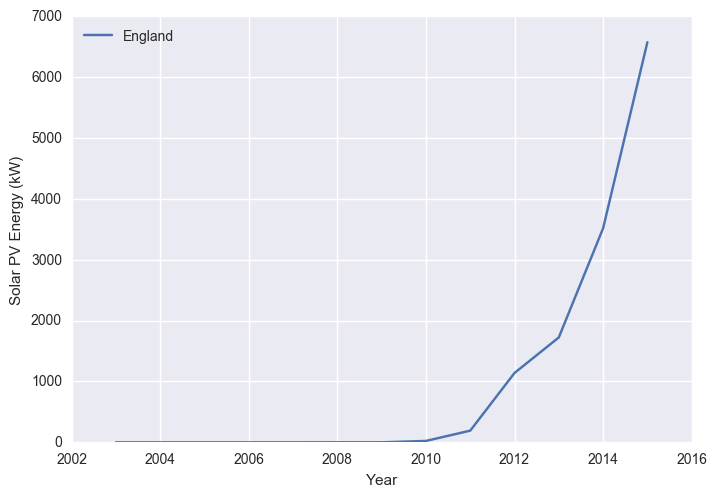

In [11]:
#Question 2: Make function when I input region and energy, I will get yearly plot with legend, title, etc
def plot_trend(df,region,energy):
    desired_df=df[df['Region']==region][['Year',energy]]
    desired_df.set_index('Year',inplace=True)
    plt.plot(desired_df,label=region)
    plt.ylabel(energy+' Energy (kW)')
    plt.xlabel('Year')
    plt.legend(loc="best")

plot_trend(energy_df_numeric,'England','Solar PV')

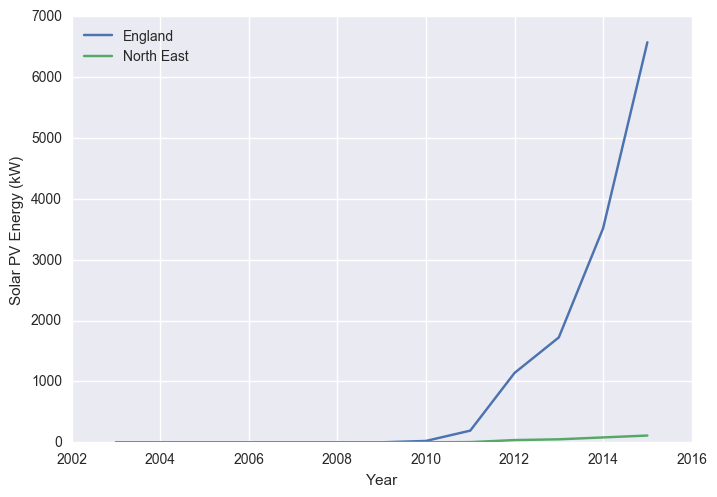

In [12]:
#Upgrade: multiple regions so multiple graphs in one plot

def plot_energy_per_region(df,regions,energy):
  for region in regions:
    plot_trend(df,region,energy)
    

plot_energy_per_region(energy_df_numeric,['England','North East'],'Solar PV')